<a href="https://colab.research.google.com/github/milowia/python_wagon/blob/main/Project_Statistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Context

The Brazilian E-Commerce Public Dataset by Olist contains information about orders, customers, products, and payments from 2016 to 2018. It includes data on orders made at Olist Store, which is divided into multiple datasets linked by unique identifiers.

Choose 2 themes
* Customer satisfaction and Order price

Questions to answer
*  Is there a correlation between the amount spent on orders and the satisfaction rating given by customers?

Data sources
* olist_customers_dataset.csv
* olist_orders_dataset.csv
* olist_order_reviews_dataset
* olist_order_payments_dataset.csv


## 1. Data Exploration and Preparation


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import customer and orders dataset from Google Drive
#import reviewws and payment dataset
df_customer = pd.read_csv('/content/drive/MyDrive/Le Wagon - DA/Feb 04 - Python Project Statistics Olist/olist_customers_dataset.csv')
df_orders = pd.read_csv('/content/drive/MyDrive/Le Wagon - DA/Feb 04 - Python Project Statistics Olist/olist_orders_dataset.csv')
df_reviews = pd.read_csv('/content/drive/MyDrive/Le Wagon - DA/Feb 04 - Python Project Statistics Olist/olist_order_reviews_dataset.csv')
df_payment = pd.read_csv('/content/drive/MyDrive/Le Wagon - DA/Feb 04 - Python Project Statistics Olist/olist_order_payments_dataset.csv')

In [ ]:
#Add review_score to the correspond order in df_orders
df_orders = pd.merge(left=df_orders, right=df_reviews[['order_id', 'review_score']], how='left', on='order_id')

In [ ]:
#Add payment_value to the corresponded order in df_orders
df_orders = pd.merge(left=df_orders, right=df_payment[['order_id', 'payment_value']], how='left', on='order_id')
df_orders

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
4       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
...                                  ...                               ...   
123821  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
123822  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
123823  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
123824  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
123825  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
4         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
...             ...                      ...                  ...   
123821    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
123822    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
123823    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
123824    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
123825    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2017-10-04 19:55:00           2017-10-10 21:25:13   
4               2017-10-04 19:55:00           2017-10-10 21:25:13   
...                             ...                           ...   
123821          2017-03-10 11:18:03           2017-03-17 15:08:01   
123822          2018-02-07 23:22:42           2018-02-28 17:37:56   
123823          2017-08-28 20:52:26           2017-09-21 11:24:17   
123824          2018-01-12 15:35:03           2018-01-25 23:32:54   
123825          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  review_score  payment_value_x  \
0                2017-10-18 00:00:00           4.0            18.12   
1                2017-10-18 00:00:00           4.0            18.12   
2                2017-10-18 00:00:00           4.0            18.12   
3                2017-10-18 00:00:00           4.0             2.00   
4                2017-10-18 00:00:00           4.0             2.00   
...                              ...           ...              ...   
123821           2017-03-28 00:00:00           5.0            85.08   
123822           2018-03-02 00:00:00           4.0           195.00   
123823           2017-09-27 00:00:00           5.0           271.01   
123824           2018-02-15 00:00:00           2.0           441.16   
123825           2018-04-03 00:00:00           5.0            86.86   

        payment_value_y  
0                 18.12  
1                  2.00  
2                 18.59  
3                 18.12  
4                  2.00  
...                 ...  
123821            85.08  
123822           195.00  
123823           271.01  
123824           441.16  
123825            86.86  

[123826 rows x 11 columns]

## 2. Descriptive Statistics

### 2.1 Customer Satisfaction Ratings

In [ ]:
#Aggregate the number of reviews from 1 to 5
#create a dict item with nb of customers per rating
rating_1 = (df_orders['review_score'] == 1).sum()
rating_2 = (df_orders['review_score'] == 2).sum()
rating_3 = (df_orders['review_score'] == 3).sum()
rating_4 = (df_orders['review_score'] == 4).sum()
rating_5 = (df_orders['review_score'] == 5).sum()

nb_review = {'rating_1': rating_1, 'rating_2': rating_2, 'rating_3': rating_3, 'rating_4': rating_4, 'rating_5': rating_5}

#create a df_ratings with nb of different reviews
df_ratings = pd.DataFrame(data=nb_review, index=['nb'])
df_ratings

rating_1  rating_2  rating_3  rating_4  rating_5
nb     11975      3330      8543     20008     59822

In [ ]:
#aggregate nb of review isnull
#add the null coumn in the df_ratings
rating_null = (df_orders['review_score'].isnull()).sum()
df_ratings['rating_null'] = rating_null
df_ratings

rating_1  rating_2  rating_3  rating_4  rating_5  rating_null
nb     11975      3330      8543     20008     59822          800

<Axes: >

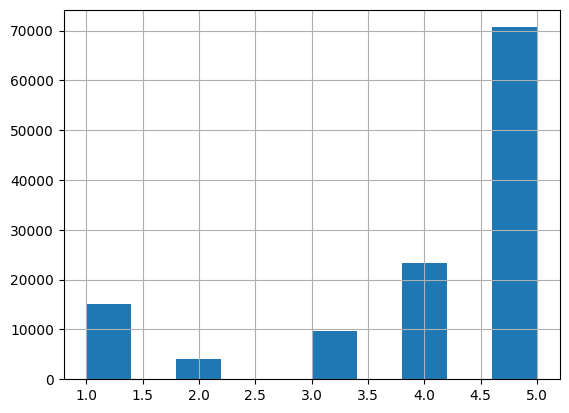

In [ ]:
df_orders['review_score'].hist()

### 2.2 Order price

In [ ]:
df_orders['payment_value'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 104478 entries, 0 to 104477
Series name: payment_value
Non-Null Count   Dtype  
--------------   -----  
104477 non-null  float64
dtypes: float64(1)
memory usage: 816.4 KB


In [ ]:
df_orders['payment_value'].describe()

count    104477.000000
mean        153.923071
std         217.120187
min           0.000000
25%          56.780000
50%         100.000000
75%         171.690000
max       13664.080000
Name: payment_value, dtype: float64

(0.0, 1500.0)

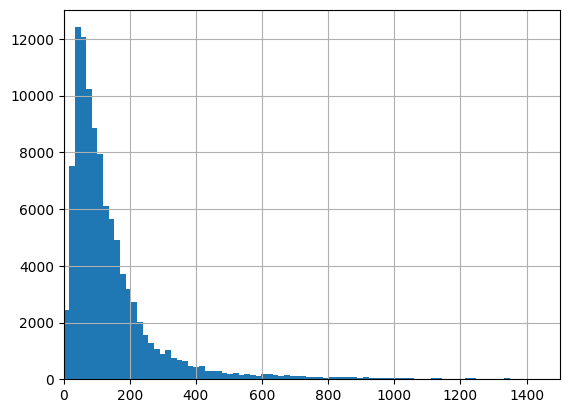

In [ ]:
#display the price distribution using .hist
df_orders['payment_value'].hist(bins=800)
plt.xlim(0, 1500)


In [ ]:
#aggregate nb of orders based on high, medium, low price range
#vip > 500, small < 100, medium the rest
vip = (df_orders['payment_value'] >= 500).sum()
small = (df_orders['payment_value'] <= 100).sum()
medium = ((df_orders['payment_value'] > 100) & (df_orders['payment_value'] < 500)).sum()

price_range = {'vip': vip, 'medium': medium, 'small': small}
df_price = pd.DataFrame(data=price_range, index=['nb'])
df_price

vip  medium  small
nb  4276   47742  52459

### 2.3 Create model for testing

In [ ]:
#drop null ratings
df_orders_model = df_orders.dropna(subset=['review_score'])
#drop unrelevant columns
df_orders_model = df_orders_model.drop(['order_status',
                      'order_purchase_timestamp',
                      'order_approved_at',
                      'order_delivered_carrier_date',
                      'order_delivered_customer_date',
                      'order_estimated_delivery_date'], axis=1)
df_orders_model

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
104473  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
104474  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
104475  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
104476  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
104477  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

        review_score  payment_value  
0                4.0          18.12  
1                4.0           2.00  
2                4.0          18.59  
3                4.0         141.46  
4                5.0         179.12  
...              ...            ...  
104473           5.0          85.08  
104474           4.0         195.00  
104475           5.0         271.01  
104476           2.0         441.16  
104477           5.0          86.86  

[103678 rows x 4 columns]

In [ ]:
# create a price_range serie to transform price from a continuous variable(payment_value) to a categorical variable(price_range)

# define bins and labels for .cut function
bins = [0, 100, 500, float('inf')]
labels = ['small', 'medium', 'vip']

df_orders_model['price_range'] = pd.cut(df_orders_model['payment_value'],
                                        bins=bins,
                                        labels=labels,
                                        include_lowest=True)
df_orders_model


order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
104473  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
104474  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
104475  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
104476  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
104477  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

        review_score  payment_value price_range  
0                4.0          18.12       small  
1                4.0           2.00       small  
2                4.0          18.59       small  
3                4.0         141.46      medium  
4                5.0         179.12      medium  
...              ...            ...         ...  
104473           5.0          85.08       small  
104474           4.0         195.00      medium  
104475           5.0         271.01      medium  
104476           2.0         441.16      medium  
104477           5.0          86.86       small  

[103678 rows x 5 columns]

In [ ]:
# repeat the process to create a review_range variable
bins = [0, 3, 5]
labels = ['unsatisfied', 'satisfied']

df_orders_model['review_range'] = pd.cut(df_orders_model['review_score'],
                                        bins=bins,
                                        labels=labels,
                                        include_lowest=True)



In [ ]:
# verify the baseline
nb_satisfied = (df_orders_model['review_range'] == 'satisfied').sum()
nb_unsatisfied = (df_orders_model['review_range'] == 'unsatisfied').sum()
print(nb_satisfied, nb_unsatisfied)

79830 23848


In [ ]:
# final cleaning drop the price isnul
df_orders_model = df_orders_model.dropna(subset=['payment_value'], inplace=True)

In [ ]:
df_orders_model

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
104473  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
104474  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
104475  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
104476  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
104477  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

        review_score  payment_value price_range review_range  
0                4.0          18.12       small    satisfied  
1                4.0           2.00       small    satisfied  
2                4.0          18.59       small    satisfied  
3                4.0         141.46      medium    satisfied  
4                5.0         179.12      medium    satisfied  
...              ...            ...         ...          ...  
104473           5.0          85.08       small    satisfied  
104474           4.0         195.00      medium    satisfied  
104475           5.0         271.01      medium    satisfied  
104476           2.0         441.16      medium  unsatisfied  
104477           5.0          86.86       small    satisfied  

[103677 rows x 6 columns]

#3. Conduct Chi-square Hypothesis Testing

Select a hypothesis to test
*  Does the order price affect customer satisfaction?

Define null and alternative hypotheses.
* Null Hypothesis (H0): There is no difference in customer satisfaction between orders with vip price and orders with small price.

* Alternative Hypothesis (H1): Orders with vip price have lower customer satisfaction compared to orders with small price.



In [ ]:

# create a contingency table

df_contingency = pd.crosstab(df_orders_model['price_range'], df_orders_model['review_range'])
df_contingency

review_range  unsatisfied  satisfied
price_range                         
small               11259      40834
medium              11397      35968
vip                  1191       3028

In [ ]:
import scipy.stats as stats

chi_res = stats.chi2_contingency(df_contingency)
print(f"the pvalue for chi-square test is {chi_res[1]}")


the pvalue for chi-square test is 1.0490620074724222e-33


# 4. Visualization and Interpretation


In [ ]:
fig = px.scatter(df_orders_model, x='review_score', y='review_range', size='payment_value', color='payment_value', size_max=100)
fig.update_xaxes(tickvals=[1, 2, 3, 4, 5], dtick=1)
fig.show()

In [ ]:
fig = px.histogram(df_orders_model, x='price_range', y='payment_value',
             color='review_range', barmode='relative',
             height=400)
fig.show()